<div align="center">

<div align="center">
<img src="../images/logo_adela.jpg" alt="logo" width="600"/>
</div>

## AdeLA 2025

## Región de atacama, Chile

</div>

# Outline

* The membership problem
* Unsupervised techniques
    * DBSCAN
    * HDBSCAN
* Supervised techniques
    * Neural Networks

<div align="center">

# The membership problem

<div align="center">
<img src="../images/membership.png" alt="membership" width="400"/>
</div>

</div>

* Proper motions (the classic probability approach)
* Machine learning (unsupervised techniques on astrometric data)
    * ra, dec, pmra, pmdec, parallax, ¿v_rad?

### Distance Metrics for DBSCAN & HDBSCAN  

- **Euclidean Distance (`'euclidean'`)**  
  The straight-line distance between two points in an n-dimensional space:  
  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$  

- **Manhattan Distance (`'manhattan'`)**  
  Also called **Taxicab** or **L1 distance**, it sums the absolute differences along each dimension:  
  $$
  d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
  $$  

- **Minkowski Distance (`'minkowski'`)**  
  A generalization of both Euclidean and Manhattan distances:  
  $$
  d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
  $$  
  - If **p = 1**, it becomes the **Manhattan Distance**.  
  - If **p = 2**, it becomes the **Euclidean Distance**.  

- **Mahalanobis Distance (`'mahalanobis'`)**  
  Accounts for correlations between variables and scales differently in different directions:  
  $$
  d_M(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}
  $$  
  where **S** is the covariance matrix of the data.  

- **Haversine Distance (`'haversine'`)**  
  Used for measuring great-circle distances between two points on a sphere (e.g., latitude/longitude):  
  $$
  d_h = 2r \cdot \arcsin \left( \sqrt{\sin^2 \left(\frac{\Delta \phi}{2} \right) + \cos(\phi_1) \cos(\phi_2) \sin^2 \left(\frac{\Delta \lambda}{2} \right) } \right)
  $$  
  where:  
  - \( $\phi_1$, $\phi_2$ \) are the latitudes,  
  - \( $\Delta$ $\phi$ = $\phi_2$ - $\phi_1$ \),  
  - \( $\Delta$ $\lambda$ \) is the longitude difference,  
  - \( $r$ \) is the Earth's radius.  


<div align="center">

# DBSCAN

DBSCAN identifies overdensities by computing distances between points in the data set. It mainly depends on two hyperparameters: minPts and 𝜖 (Ester +1996)

<div align="center">
<img src="../images/dbscan.png" alt="membership" width="200"/>
</div>

Schematic representation with minPts = 3 (Castro-Ginard+2018)

</div>


Points are classified as: 
- <span style="color:green">Core points</span>
- <span style="color:blue">Border points</span>
- <span style="color:red">Outliers</span>


### DBSCAN Hyperparameters  

- **`eps` (ϵ - Epsilon):**  
  Defines the maximum distance between two points to be considered neighbors.  

- **`min_samples`:**  
  The minimum number of points (including the core point) required to form a dense region.  

- **`metric`:**  
  The distance metric used to measure the similarity between points (default is Euclidean distance).  

- **`leaf_size`:**  
  Affects the speed of the nearest neighbor search (used in KD-tree and Ball-tree).  

- **`algorithm`:**  
  Determines the algorithm for nearest neighbor search (`'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`).  

- **`p`:**  
  The power parameter for the Minkowski metric (p=2 is Euclidean distance, p=1 is Manhattan distance).  


In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler
import numpy as np
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.cluster import HDBSCAN
import astropy.units as u
import astropy.coordinates as apycoords
import os
import glob
# from zero_point import zpt
from tqdm import tqdm
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('/Users/steven/Documents/NGC_6752_extra_tidal_5-result.csv') # full gaia sample for one cluster
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69235 entries, 0 to 69234
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_id                  69235 non-null  int64  
 1   ra                         69235 non-null  float64
 2   ra_error                   69235 non-null  float64
 3   dec                        69235 non-null  float64
 4   dec_error                  69235 non-null  float64
 5   l                          69235 non-null  float64
 6   b                          69235 non-null  float64
 7   parallax                   69235 non-null  float64
 8   parallax_error             69235 non-null  float64
 9   pmra                       69235 non-null  float64
 10  pmra_error                 69235 non-null  float64
 11  pmdec                      69235 non-null  float64
 12  pmdec_error                69235 non-null  float64
 13  phot_g_mean_mag            69234 non-null  flo

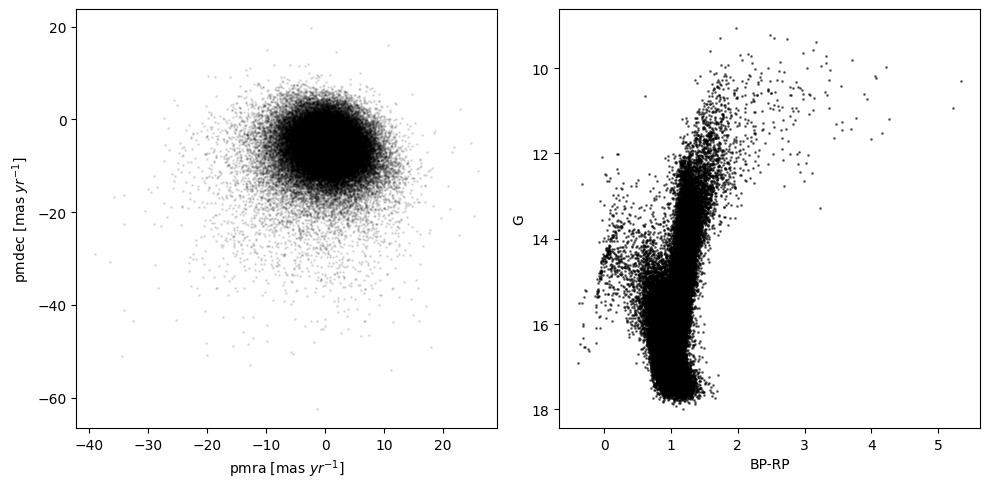

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(df['pmra'], df['pmdec'], s=1, alpha=0.1, c='k')
ax[0].set_xlabel("pmra [mas $yr^{-1}$]")
ax[0].set_ylabel("pmdec [mas $yr^{-1}$]")

ax[1].scatter(df['phot_bp_mean_mag'] - df['phot_rp_mean_mag'], df['phot_g_mean_mag'], s=1, alpha=0.5, c='k')
ax[1].set_xlabel("BP-RP")
ax[1].set_ylabel("G")
ax[1].invert_yaxis()
fig.tight_layout()

In [4]:
clustering_on = ['ra','dec','pmra','pmdec','parallax']

data = df[clustering_on]
data = RobustScaler().fit_transform(data)

# DBSCAN

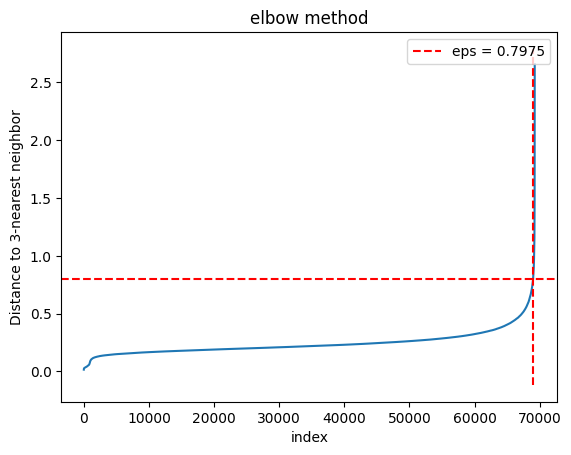

In [5]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

k = 3  # if min_samples = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(data)
distances, indices = nbrs.kneighbors(data)

k_distances = distances[:, -1]  # Última columna contiene la distancia al k-ésimo vecino
k_distances = np.sort(k_distances)

knee = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
eps_knee = k_distances[knee.knee]

plt.plot(k_distances)
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.axhline(y=eps_knee, color='r', linestyle='--', label=f"eps = {np.round(eps_knee, 4)}")
plt.xlabel("index")
plt.ylabel(f"Distance to {k}-nearest neighbor")
plt.title("elbow method")
plt.legend()
plt.show()

In [6]:
#db = DBSCAN(eps=eps_knee, min_samples=10).fit(data) # n_jobs = 4
db = DBSCAN(eps=0.2, min_samples=10).fit(data) # n_jobs = 4

In [7]:
labels = db.labels_
df['label_db'] = labels
for i in list(set(labels)):
    print('{} {}'.format(i,len(df[(df['label_db'] == i)])))

0 21
1 15
2 20
3 10
4 9
5 17
6 23
7 62
8 12
9 12
10 24
11 1067
12 11
13 10
14 15
15 10
16 10
17 10
18 8
19 10
20 18
21 10
22 24
23 14
24 8
25 10
26 14
27 10
28 10
29 23
30 16
31 10
32 26
33 8
34 10
35 10
36 10
37 15
38 14
39 10
40 10
41 10
42 11
43 18
44 10
45 10
46 9
47 10
48 9
49 11
50 10
51 10
52 10
53 10
54 28
55 33
56 23
57 10
58 10
59 23
60 17
61 10
62 10
63 9
64 8
65 7
66 10
67 11
68 10
69 10
70 10
71 10
72 11
73 10
74 10
-1 67161


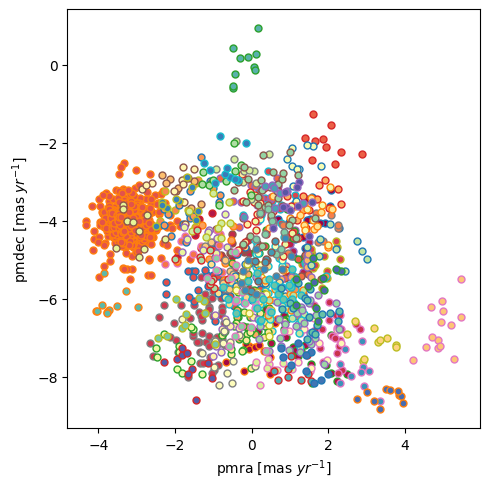

In [9]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(5,5))
for i, j in zip(list(unique_labels), colors):
    if i != -1:
        plt.plot(df['pmra'][(df['label_db'] == i)], df['pmdec'][(df['label_db'] == i)], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None',markersize = 5, alpha = 1)
plt.xlabel("pmra [mas $yr^{-1}$]")
plt.ylabel("pmdec [mas $yr^{-1}$]")
plt.tight_layout()
plt.show() 

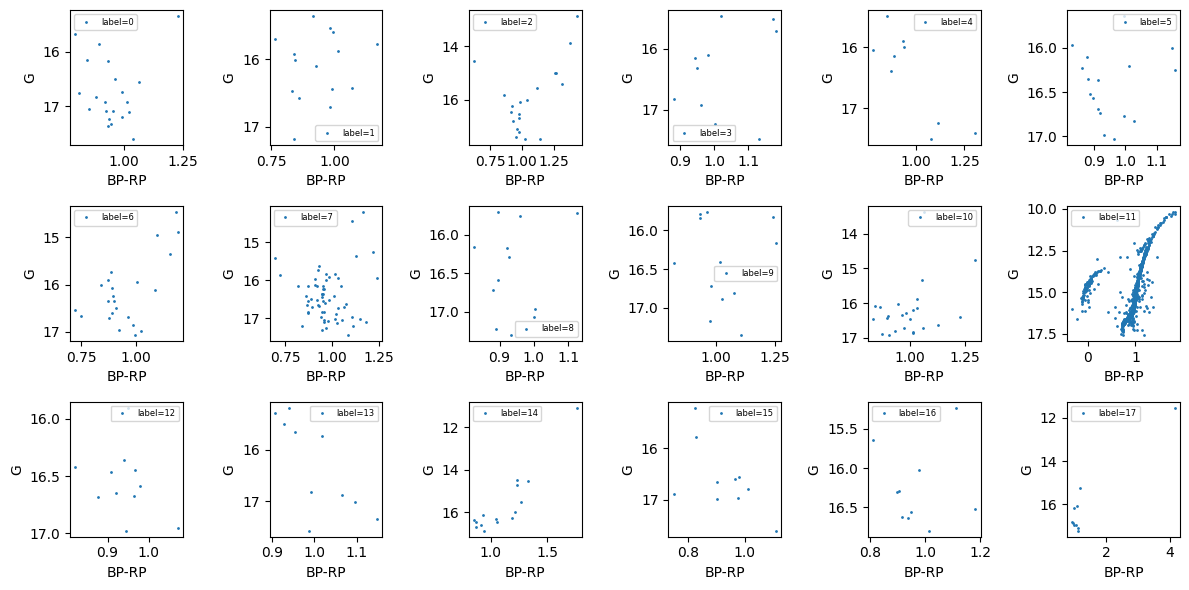

In [16]:
fig, axes = plt.subplots(3, 6, figsize=(12,6))

for i, j, ax in zip(list(unique_labels), colors, axes.flat):
    if i != -1:
        condition = (df['label_db'] == i)
        ax.plot(df['phot_bp_mean_mag'][condition] - df['phot_rp_mean_mag'][condition], df['phot_g_mean_mag'][condition], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None', markersize=1, label=f'label={i}')
    ax.set_xlabel("BP-RP")
    ax.set_ylabel("G")
    ax.invert_yaxis()
    ax.legend(fontsize=6)

fig.tight_layout()
plt.show() 

<div align="center">

# HDBSCAN

</div>

* Compute the core distance1 for the k nearest neighbors for all points in the set
* Compute the extended minimum spanning tree from a weighted graph, where the mutual reachability distances2 are the edges
* Build the HDBSCAN hierarchy from the extended minimum spanning tree
* Find the prominent clusters from the hierarchy

<div align="center">

<div align="center">
<img src="../images/hdbscan.png" alt="membership" width="500"/>
</div>

Schematic representation of HDBSCAN (Campello+2013)
</div>

* k(i) = distance from i to its kth nearest neighbor
* dmr(i,j) = max{k(i), k(j), d(I,j) if i≠j}; 0 if i=j


### HDBSCAN Hyperparameters  

- **`min_cluster_size`:**  
  Minimum number of points needed to form a cluster. Smaller values detect smaller clusters.  

- **`min_samples`:**  
  Controls how conservative the clustering is. Higher values make clusters more robust to noise.  

- **`cluster_selection_epsilon`:**  
  A distance threshold for merging clusters. Works similarly to `eps` in DBSCAN.  

- **`metric`:**  
  Distance metric used to compute point similarity (default: `'euclidean'`).  

- **`cluster_selection_method`:**  
  Determines how clusters are extracted (`'eom'` for excess of mass, `'leaf'` for leaf clusters).  

- **`alpha`:**  
  Controls the relative importance of density-based and distance-based clustering.  

- **`leaf_size`:**  
  Affects the speed of KD-tree and Ball-tree nearest neighbor searches.  

- **`core_dist_n_jobs`:**  
  Number of parallel jobs for computing core distances (`-1` uses all processors).  


In [21]:
#hd = HDBSCAN(min_cluster_size=20, min_samples=5, metric='mahalanobis', metric_params={'V': np.cov(data, rowvar=False)}).fit(data)
hd = HDBSCAN(min_cluster_size=100, min_samples=10, metric='euclidean').fit(data)

In [22]:
labels = hd.labels_ 
df['label_hb'] = labels
for i in list(set(labels)):
    print('{} {}'.format(i,len(df[(df['label_hb'] == i)])))

0 2847
1 1043
-1 65345


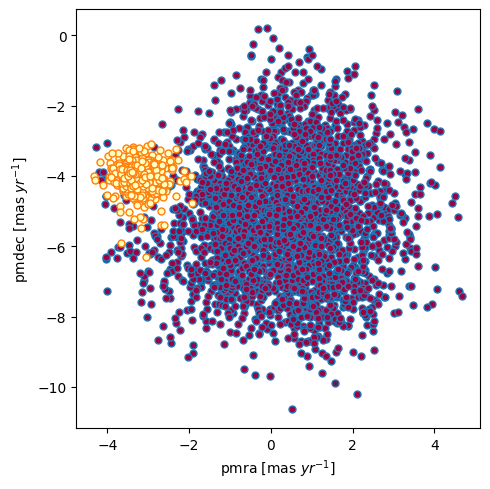

In [23]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(5,5))
for i, j in zip(list(unique_labels), colors):
    if i != -1:
        condition = (df['label_hb'] == i)
        plt.plot(df['pmra'][condition], df['pmdec'][condition], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None',markersize = 5, alpha = 1)
plt.xlabel("pmra [mas $yr^{-1}$]")
plt.ylabel("pmdec [mas $yr^{-1}$]")
plt.tight_layout()
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


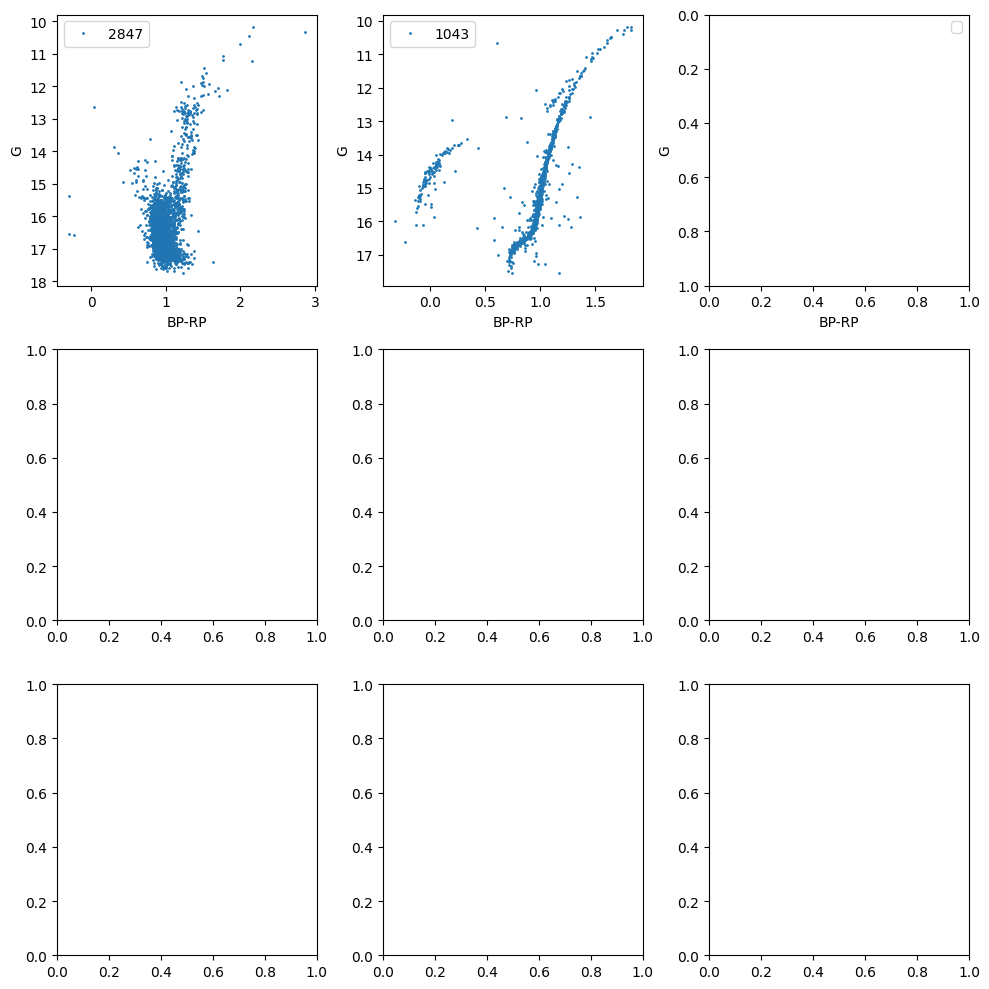

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))

for i, j, ax in zip(list(unique_labels), colors, axes.flat):
    if i != -1:
        condition = (df['label_hb'] == i)
        ax.plot(df['phot_bp_mean_mag'][condition] - df['phot_rp_mean_mag'][condition], df['phot_g_mean_mag'][condition], 
         markerfacecolor = tuple(j), marker='o', linestyle='None', markersize=1, label=f'{len(df[condition])}')
    ax.set_xlabel("BP-RP")
    ax.set_ylabel("G")
    ax.invert_yaxis()
    ax.legend()

fig.tight_layout()
plt.show() 